## 1. Re-code the house price machine learning

In [3]:
from sklearn.datasets import load_boston
import random

In [4]:
import matplotlib.pyplot as plt

In [5]:
datasets = load_boston()

In [6]:
#datasets

In [7]:
datasets.feature_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
datasets.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [9]:
x,y = datasets['data'],datasets['target']

In [10]:
x.shape

(506, 13)

In [11]:
y.shape

(506,)

In [28]:
x_dis = x[:,7]

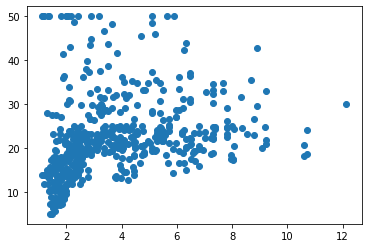

In [29]:
plt.scatter(x_dis,y)

In [30]:
def price(dis,k,b):
    return k * dis + b

### $$ loss = \frac{1}{n} \sum{|y_i - \hat{y_i}|}$$

### $$ loss = \frac{1}{n} \sum{|y_i - kx_i-b_i|}$$

### $$ \frac{\partial{loss}}{\partial{b}} = 
\begin{cases}
-\frac{1}{n}\sum(x_i)     &y_i > {\hat{y_i } }\\
\frac{1}{n}\sum(x_i)      &y_i < {\hat{y_i } }\\
\end{cases}$$


### $$ \frac{\partial{loss}}{\partial{b}} = 1$$


In [31]:
def loss(y,y_hat):
    return sum((abs(y_i-y_hat_i)) for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [611]:
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if(y_i>y_hat_i):
            gradient += -x_i
        else:
            gradient += x_i
    return 1/n * gradient

def partial_derivative_b(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if(y_i>y_hat_i):
            gradient += -1
        else:
            gradient += 1
    return 1/n * gradient

In [613]:
k = random.random()*100 - 50
b = random.random()*100 - 50
learning_rate = 1e-1
iteration_num =300
losses = []
for i in range(iteration_num):
    price_current_use_params = [price(r, k, b) for r in x_dis]
    current_loss = loss(y,price_current_use_params)
    losses.append(current_loss)
    k_gradient = partial_derivative_k(x_dis,y,price_current_use_params)
    b_gradient = partial_derivative_b(x_dis,y,price_current_use_params)
    k = k+(-1*k_gradient)*learning_rate
    b = b+(-1*b_gradient)*learning_rate
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
best_k = k
best_b = b

Iteration 0, the loss is 175.84467545377618, parameters k is 44.58435876562482 and b is 27.637702156329674
Iteration 1, the loss is 174.30444055359362, parameters k is 44.20485449685012 and b is 27.537702156329672
Iteration 2, the loss is 172.7642056534115, parameters k is 43.825350228075415 and b is 27.43770215632967
Iteration 3, the loss is 171.2239707532294, parameters k is 43.44584595930071 and b is 27.33770215632967
Iteration 4, the loss is 169.6837358530473, parameters k is 43.06634169052601 and b is 27.237702156329668
Iteration 5, the loss is 168.14350095286503, parameters k is 42.68683742175131 and b is 27.137702156329667
Iteration 6, the loss is 166.6032660526828, parameters k is 42.307333152976604 and b is 27.037702156329665
Iteration 7, the loss is 165.0630311525005, parameters k is 41.9278288842019 and b is 26.937702156329664
Iteration 8, the loss is 163.5227962523182, parameters k is 41.5483246154272 and b is 26.837702156329662
Iteration 9, the loss is 161.98256135213617, 

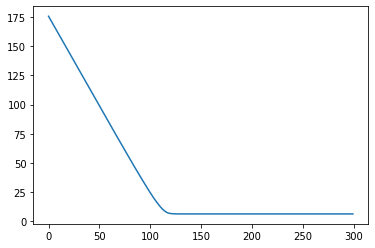

In [614]:
plt.plot(list(range(iteration_num)),losses)

the loss is 9.750021646452122,   k is  1.1399409000122442 and b is  16.34323575316761


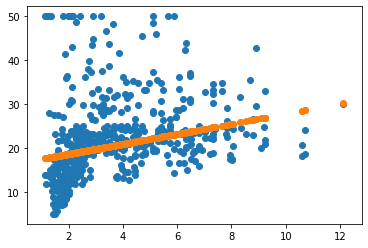

In [615]:
price_use_best_parameters = [price(r, best_k, best_b) for r in x_dis]
print("the loss is {},   k is  {} and b is  {}".format(best_loss,best_k,best_b))
plt.scatter(x_dis,y)
plt.scatter(x_dis,price_current_use_params)